<a href="https://colab.research.google.com/github/ersilia-os/event-fund-ai-drug-discovery/blob/main/notebooks/session4_breakout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 4: Generative Models

This notebook explores generative models based on similarity searches (using a molecule as initial hit, looks for similar molecules in a virtually generated library).
We will use our top10 hits from Session 2 to explore how these models work.

## Initial Hits

Each generative model requires a starting point, a molecule that will serve as a blueprint for the generation of novel molecules.

In this exercise, we will use the top10 hits from session 2 that you selected from the MMV malaria box. These should be stored in your drive under DataScience_Workshop/data/day2

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#import the necessary packages
import pandas as pd

#we can open it as a pandas dataframe
data = "drive/MyDrive/DataScience_Workshop/data/day2/mmv_malariabox_selection.csv"
df=pd.read_csv(data)
df.head()

,Unnamed: 0,key,input,maip,chemtb,antib,herg,ra,sol,np
0,136,HPFVQAYLQOSFOL-UHFFFAOYSA-N,COc1cccc(Nc2nc(NCCO)c3ccccc3n2)c1,77.19902,0.096129,0.005617,5.501676,0.987168,-3.457,-9.260608
1,69,RHZLKBRFIAZMTN-UHFFFAOYSA-N,Cc1ccc(Nc2nc(NCCO)c3ccccc3n2)cc1C,76.05250,0.088322,0.006066,5.449112,0.988130,-3.743,-7.866877
2,28,DSQFFQFYQVGMPS-UHFFFAOYSA-N,CNCCCNc1ccnc2cc(Cl)ccc12,71.68302,0.087292,0.025201,4.933387,0.995203,-2.180,-4.078742
3,173,ULJISGNQAXNPOC-UHFFFAOYSA-N,Clc1ccc2[nH]c3c(NCCCN4CCOCC4)ncnc3c2c1,68.27074,0.117942,0.004766,5.592291,0.989207,-3.008,-7.842378
4,353,VTHMRLOUPKJVSL-UHFFFAOYSA-N,CN1CCN(c2nc(Nc3ccc(O)cc3)nc3ccccc23)CC1,67.53253,0.082182,0.018570,5.683293,0.991483,-3.408,-10.478223


In [6]:
smiles = df["input"].tolist()

## Ersilia Model Hub
First, we need to install Ersilia in this Google Colab notebook.

In [1]:
#@title The Ersilia Model Hub
#@markdown Click on the play button to install Ersilia in this Colab notebook.

%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH={PYTHONPATH}:/usr/local/lib/python3.7/site-packages
%env CONDA_PREFIX=/usr/local
%env CONDA_PREFIX_1=/usr/local
%env CONDA_DIR=/usr/local
%env CONDA_DEFAULT_ENV=base
!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX
!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
import sys
_ = (sys.path.append("/usr/local/lib/python3.7/site-packages"))

### Fetching Similarity Models
We will work with two similarity models:
* eos4b8j: gdbchembl-similarity
* eos4b8j gdbmedchem-similarity
In short, each of those models uses a virtually generated library of billions of hits to identify the 100 most similar to the starting point. You can read more about them on their respective publications([gdbchembl](https://www.frontiersin.org/articles/10.3389/fchem.2020.00046/full) and [gdbmedchem](https://onlinelibrary.wiley.com/doi/abs/10.1002/minf.201900031))

GDBChEMBL contains a collection of 166.4 billion possible molecules of up to 17 atoms, and is browsable [here](http://faerun.gdb.tools/). The GBDMedChEM is a curated version of GDBChEMBL and restricts the search space to 10 million [molecules](http://gdb.unibe.ch)

*Disclaimer: both these models post predictions online. If you are concerned about IP privacy issues check the publication for more information on data policy.* 

In [13]:
#we first fetch both models from the Ersilia repository

!ersilia fetch eos4b8j
!ersilia fetch eos7jlv

⬇️  Fetching model eos4b8j: gdbchembl-similarity
👍 Model eos4b8j fetched successfully!
⬇️  Fetching model eos7jlv: gdbmedchem-similarity
👍 Model eos7jlv fetched successfully!


In [ ]:
#running as python package
from ersilia import ErsiliaModel

model = ErsiliaModel("eos4b8j")
model.serve()
output = model.predict(input="CCCC", output="pandas")
model.close()

In [ ]:
from ersilia import ErsiliaModel

model = ErsiliaModel("eos7jlv")
model.serve()
output = model.predict(input="CCCC", output="pandas")
model.close()

## Generating a 100 molecules from the top hit
Together we will walk through an example of how we can generate hits from the best molecule we found in the MMV Malaria Box using the similarity search in ChEMBL

In [15]:
# select the top1 hit and see its structure
smi = smiles[1]

In [17]:
smi

'Cc1ccc(Nc2nc(NCCO)c3ccccc3n2)cc1C'

In [18]:
#revise session 2 skills development if you are unsure about this step to visualise molecules using RdKit
%%capture
!pip install rdkit

from rdkit import Chem
from rdkit.Chem import Draw

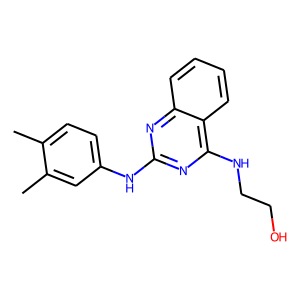

In [22]:
mol = Chem.MolFromSmiles(smi)
Draw.MolToImage(mol)

In [24]:
!ersilia serve eos4b8j
!ersilia api predict -i "Cc1ccc(Nc2nc(NCCO)c3ccccc3n2)cc1C" -o "drive/MyDrive/DataScience_Workshop/data/day4/eos4b8j_top1.csv"

🚀 Serving model eos4b8j: gdbchembl-similarity

   URL: http://127.0.0.1:60633
   PID: 3681
   SRV: conda

👉 Available APIs:
   - predict
Traceback (most recent call last):
  File "/usr/local/bin/ersilia", line 8, in <module>
    sys.exit(cli())
  File "/usr/local/lib/python3.7/site-packages/click/core.py", line 1130, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/click/core.py", line 1055, in main
    rv = self.invoke(ctx)
  File "/usr/local/lib/python3.7/site-packages/click/core.py", line 1657, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "/usr/local/lib/python3.7/site-packages/click/core.py", line 1404, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/usr/local/lib/python3.7/site-packages/click/core.py", line 760, in invoke
    return __callback(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/bentoml/cli/click_utils.py", line 138, in wrapper
    return func(*args, **